In [28]:
# Importing everything
from qiskit import QuantumCircuit
from qiskit import IBMQ, Aer, transpile, assemble
from qiskit.visualization import plot_histogram

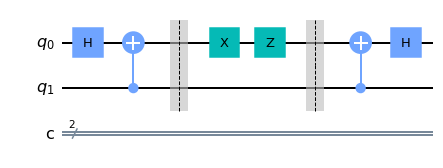

In [37]:
# Charlie has to create an entangled pair of qubits
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(1, 0)
qc.barrier()

# Alice encodes he message
message = "11"
if message[1] == "1":
    qc.x(0)
if message[0] == "1":
    qc.z(0)
    
qc.barrier()

# Bob decodes
qc.cx(1, 0)
qc.h(0)


qc.draw("mpl")

{'00': 1024}


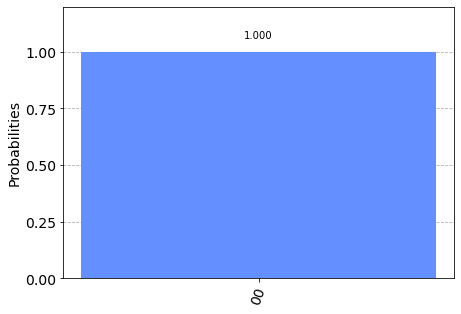

In [38]:
aer_sim = Aer.get_backend('aer_simulator')
qobj = assemble(qc)
result = aer_sim.run(qobj).result()
counts = result.get_counts(qc)
print(counts)
plot_histogram(counts)